In [1]:
import numpy as np
import pandas as pd
from itertools import combinations,combinations_with_replacement
from functools import reduce
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import matrix_rank
import seaborn as sns

<font color=black size=6><u><b>Part A: Model Code</b></u></font>

In [2]:
#1 PolynomialFeatures
# Implementation of PolynomiaFeatures:
# takes inputs matrix X and int value degree
# computes the matrix that is X^degree

def polynomialFeatures(X, degree):
    Matrix = []
    for j in range(len(X)):
        row = []
        for d in range(degree+1):
            Sub = list(combinations_with_replacement(X[j], d))
            for i in range(len(Sub)):
                comp = np.prod(Sub[i])
                row.append(comp)
        Matrix.append(row)
    return Matrix

In [3]:
#2 MSE Calculator
# takes inputs true values of Y and Y values predicted by our algorithm
# computes the mean squared error of the two inputs

def mse(Y_true,Y_pred):
    cost = np.mean((Y_true - Y_pred)**2)
    return cost

In [4]:
#3 Learning Curve:
# takes inputs model, X, Y, cv, and has default variables which could be changed
# upon user's choice.
# outputs the RMSE.
# it calculates RMSE using sFord which is a modified version of kFord function
# from last assignment.

def learning_curve(model, X, Y, cv, train_size = 1, learning_rate = 0.01, 
                  epochs = 1000, tol = None,
                   regularizer = None, lambd = 0.0,**kwargs):
    train_scores = []
    val_scores = []
    
    length = int(len(X)/train_size)
    
    for i in range(1, length+1):
        Xfolded = X[0: train_size*i]
        yfolded = Y[0: train_size*i]
        
        folded_vals =sFold(cv, Xfolded, yfolded, Linear_Regression,
                           learning_rate = learning_rate,
                           regularizer = regularizer,lambd = lambd)            
        for j in range(cv):
            X_train_preds = folded_vals[3]
            X_train_predsj = X_train_preds[j]
            

            X_test_preds = folded_vals[4]
            X_test_predsj = X_test_preds[j]
                                         
            train_array = np.asarray(X_train_predsj)
            test_array = np.asarray(X_test_predsj)
            
            mymodel = model()
            mymodel.fit(Xfolded, yfolded)
            y_train_preds = mymodel.predict(train_array)
            y_test_preds = mymodel.predict(test_array)

            trainerror = mse(y_train_preds, folded_vals[5])
            testerror = mse(y_test_preds, folded_vals[0])
            trainmse = np.sqrt(trainerror)
            testrmse = np.sqrt(testerror)

                
        train_scores.append(trainmse)
        val_scores.append(testrmse)
    
        
    return train_scores, val_scores

In [5]:
#4 polynomial_model_complexity

def plot_polynomial_model_complexity(model, X, Y, cv, maxPolynomialDegree,
                                     learning_rate=0.01, epochs=1000, tol=None,
                                     regularizer=None, lambd=0.0, **kwargs):
    train_scores = []
    val_scores = []
    
    for i in range(1, maxPolynomialDegree+1):
        Xfolded = X[0: i]
        yfolded = Y[0: i]
        
        folded_vals =sFold(cv, Xfolded, yfolded, Linear_Regression,
                           learning_rate = learning_rate,
                           regularizer = regularizer,lambd = lambd)            
        for j in range(cv):
            X_train_preds = folded_vals[3]
            X_train_predsj = X_train_preds[j]

            X_test_preds = folded_vals[4]
            X_test_predsj = X_test_preds[j]
                                         
            train_array = np.asarray(X_train_predsj)
            test_array = np.asarray(X_test_predsj)

            mymodel = model()
            mymodel.fit(Xfolded, yfolded)
            y_train_preds = mymodel.predict(train_array)
            y_test_preds = mymodel.predict(test_array)

            trainerror = mse(y_train_preds, folded_vals[5])
            testerror = mse(y_test_preds, folded_vals[0])
            trainmse = np.sqrt(trainerror)
            testrmse = np.sqrt(testerror)

                
        train_scores.append(trainmse)
        val_scores.append(testrmse)
    
    degrees = []
    for k in range(1,maxPolynomialDegree):
        degrees.append(k)
    plt.plot(degrees, train_scores, "ro-", alpha = 1.0, linewith = 1.0, label = "Train RMSE")
    plt.plot(degrees, val_scores.append, "bo-", alpha=1.0, linewidth=1.0, label="Test RMSE")
    plt.legend(loc = "best", fontsize = 14)
    plt.xlabel("Degree")
    plt.ylabel("RMSE")
    plt.title("RMSE vs Degrees up to Maximum polynomial")
    plt.show()

In [6]:
#5 Linear Regression
# a model we will be using to evaluate data.
# fit function reads over given inputs and generates theta.
# predict function uses the theta made in fit() and use it to predict the output

class Linear_Regression():
    
    def __init__(self):
        self.theta = None
        pass
    
    def fit(self, X, Y, learning_rate = 0.01, epochs = 1000,tol = None,
            regularizer = None, lambd = 0.0, **kwargs):
        
        n = X.shape[0]
        ones = np.ones(n)
        ones = np.reshape(ones, (n, -1))
        featswithbias = np.hstack((ones, X))
        X = featswithbias
        
        theta = []
        theta_hat = np.zeros(X.shape[1])
        
        
        for epoch in range(epochs):
            
            Xtheta = np.dot(X,theta_hat)    

            if regularizer == None:
                
                j_theta = (1/n)*np.dot(X.T,(Xtheta - Y))
                
                theta_hat -= (learning_rate*j_theta)
                
                self.theta = theta_hat
                
            elif regularizer=='l1':
                
                j_theta = (1/n)*((np.dot(X.T,(Xtheta-Y)))-(lambd*np.sign(theta_hat)))
                
                theta_hat -= (learning_rate*j_theta)
                
                self.theta = theta_hat
                
            elif regularizer=='l2':
                j_theta = (1/n)*((np.dot(X.T,(Xtheta - Y)))-(lambd*theta_hat))
                
                theta_hat -= (learning_rate*j_theta)
                
                self.theta = theta_hat
            else:
                print('Wrong input')
        
    def predict(self, X):
        ones = np.ones(X.shape[0])
        ones = np.reshape(ones, (X.shape[0] ,-1))
        features= np.hstack((ones,X))
        Ans = features
        y_pred = np.dot(Ans, self.theta)
        
        return y_pred
    

In [7]:
# Modified kFord from last assignment.
# used in learningcurve, plot_polynomial.
# need this to evaluate the model, and for hyperparameter tunning

def sFold(cv, X, Y, model, learning_rate, regularizer, lambd):
    Xfolded = np.split(X,cv)
    yfolded = np.split(Y,cv)
    exp = []
    predbymod = []
    # For each partition
    errors = []
    X_cv_train = []
    X_cv_test = []
    y_cv_train = []
    for cvs in range(cv):
        XfoldedTrain = []
        yfoldedTrain = []
        XfoldedTest = Xfolded[cvs]
        yfoldedTest = yfolded[cvs]
        for train in range(cv):
            if train != cvs:
                if len(XfoldedTrain) == 0:
                    XfoldedTrain = Xfolded[train]
                    yfoldedTrain = yfolded[train]
                else:
                    XfoldedTrain = np.vstack((XfoldedTrain,Xfolded[train]))
                    yfoldedTrain = np.append(yfoldedTrain,yfolded[train])
        
        
        exp.append(yfoldedTest)
        
        
        myModel = model()

        myModel.fit(XfoldedTrain, yfoldedTrain,learning_rate = learning_rate,
                    regularizer = regularizer, lambd = lambd)
        
        pred = myModel.predict(XfoldedTest)
        predbymod.append(pred)
        
        error = 0
        error = mse(yfoldedTest,pred)
        floaterr = np.array(errors, dtype = np.float64)
        floaterr = np.append(floaterr, error)
        errors = np.mean(floaterr)
        
        X_cv_train.append(XfoldedTrain)
        X_cv_test.append(XfoldedTest)
        y_cv_train.append(yfoldedTrain)
        
    
    return exp, predbymod, errors, X_cv_train, X_cv_test, y_cv_train

<font color=black size=6><u><b>Part B: Data Processing</b></u></font>

In [8]:
#6 Read in the 'winequlity-red.csv' file as a pandas data frame
df = pd.read_csv("winequality-red.csv", sep=";")
print("< Shape of the data >\n", df.shape)

# Quick check of the data
print("\n\n< winequality-red.csv - First Five Rows >\n", df.head())

# Description of the data
print("\n\n< Description of the Data >")
print(df.info())

# Summary of the numerical attributes
print("\n\n< Summary of the numerical attributes >\n", df.describe())

# Check the columns for missing data
print("\n\n< Missing data for the columns >\n", df.isnull().sum())

< Shape of the data >
 (1599, 12)


< winequality-red.csv - First Five Rows >
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alco

In [9]:
#7 Summary of each variables in the dataset.
print("\n\n7. Use the techniques from the recitation to summarize each of the variables in the dataset")
print("   in terms of mean, standard deviation, and quartiles")
# Summary of the numerical attributes
print("\n< Summary of the numerical attributes >\n", df.describe())



7. Use the techniques from the recitation to summarize each of the variables in the dataset
   in terms of mean, standard deviation, and quartiles

< Summary of the numerical attributes >
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.0

In [10]:
#8 shuffling the data frame
print("\n\n8. Shuffle the rows of your data. You can use def=df.sample(frac=1) as an idiomatic way")
print("   to shuffle the data in Pandas without losing column names.")
df_shuff = df.sample(frac = 1)

# Drop the redundant features
df = df_shuff.drop(columns = ['residual sugar','free sulfur dioxide', 'pH'])

df.head()



8. Shuffle the rows of your data. You can use def=df.sample(frac=1) as an idiomatic way
   to shuffle the data in Pandas without losing column names.


,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
813,6.9,0.39,0.24,0.102,7.0,0.99462,0.58,11.4,4
174,7.3,0.38,0.21,0.080,35.0,0.99610,0.47,9.5,5
291,11.0,0.20,0.48,0.343,18.0,0.99790,0.71,10.5,5
431,7.8,0.55,0.35,0.074,66.0,0.99740,0.56,9.2,5
337,7.8,0.43,0.32,0.080,58.0,0.99740,0.64,10.3,5




9. Generate pair plot using the seaborn package. This will be used to identify and
   report the redundant features, if there is any

< Pair Plots(seaborn) >


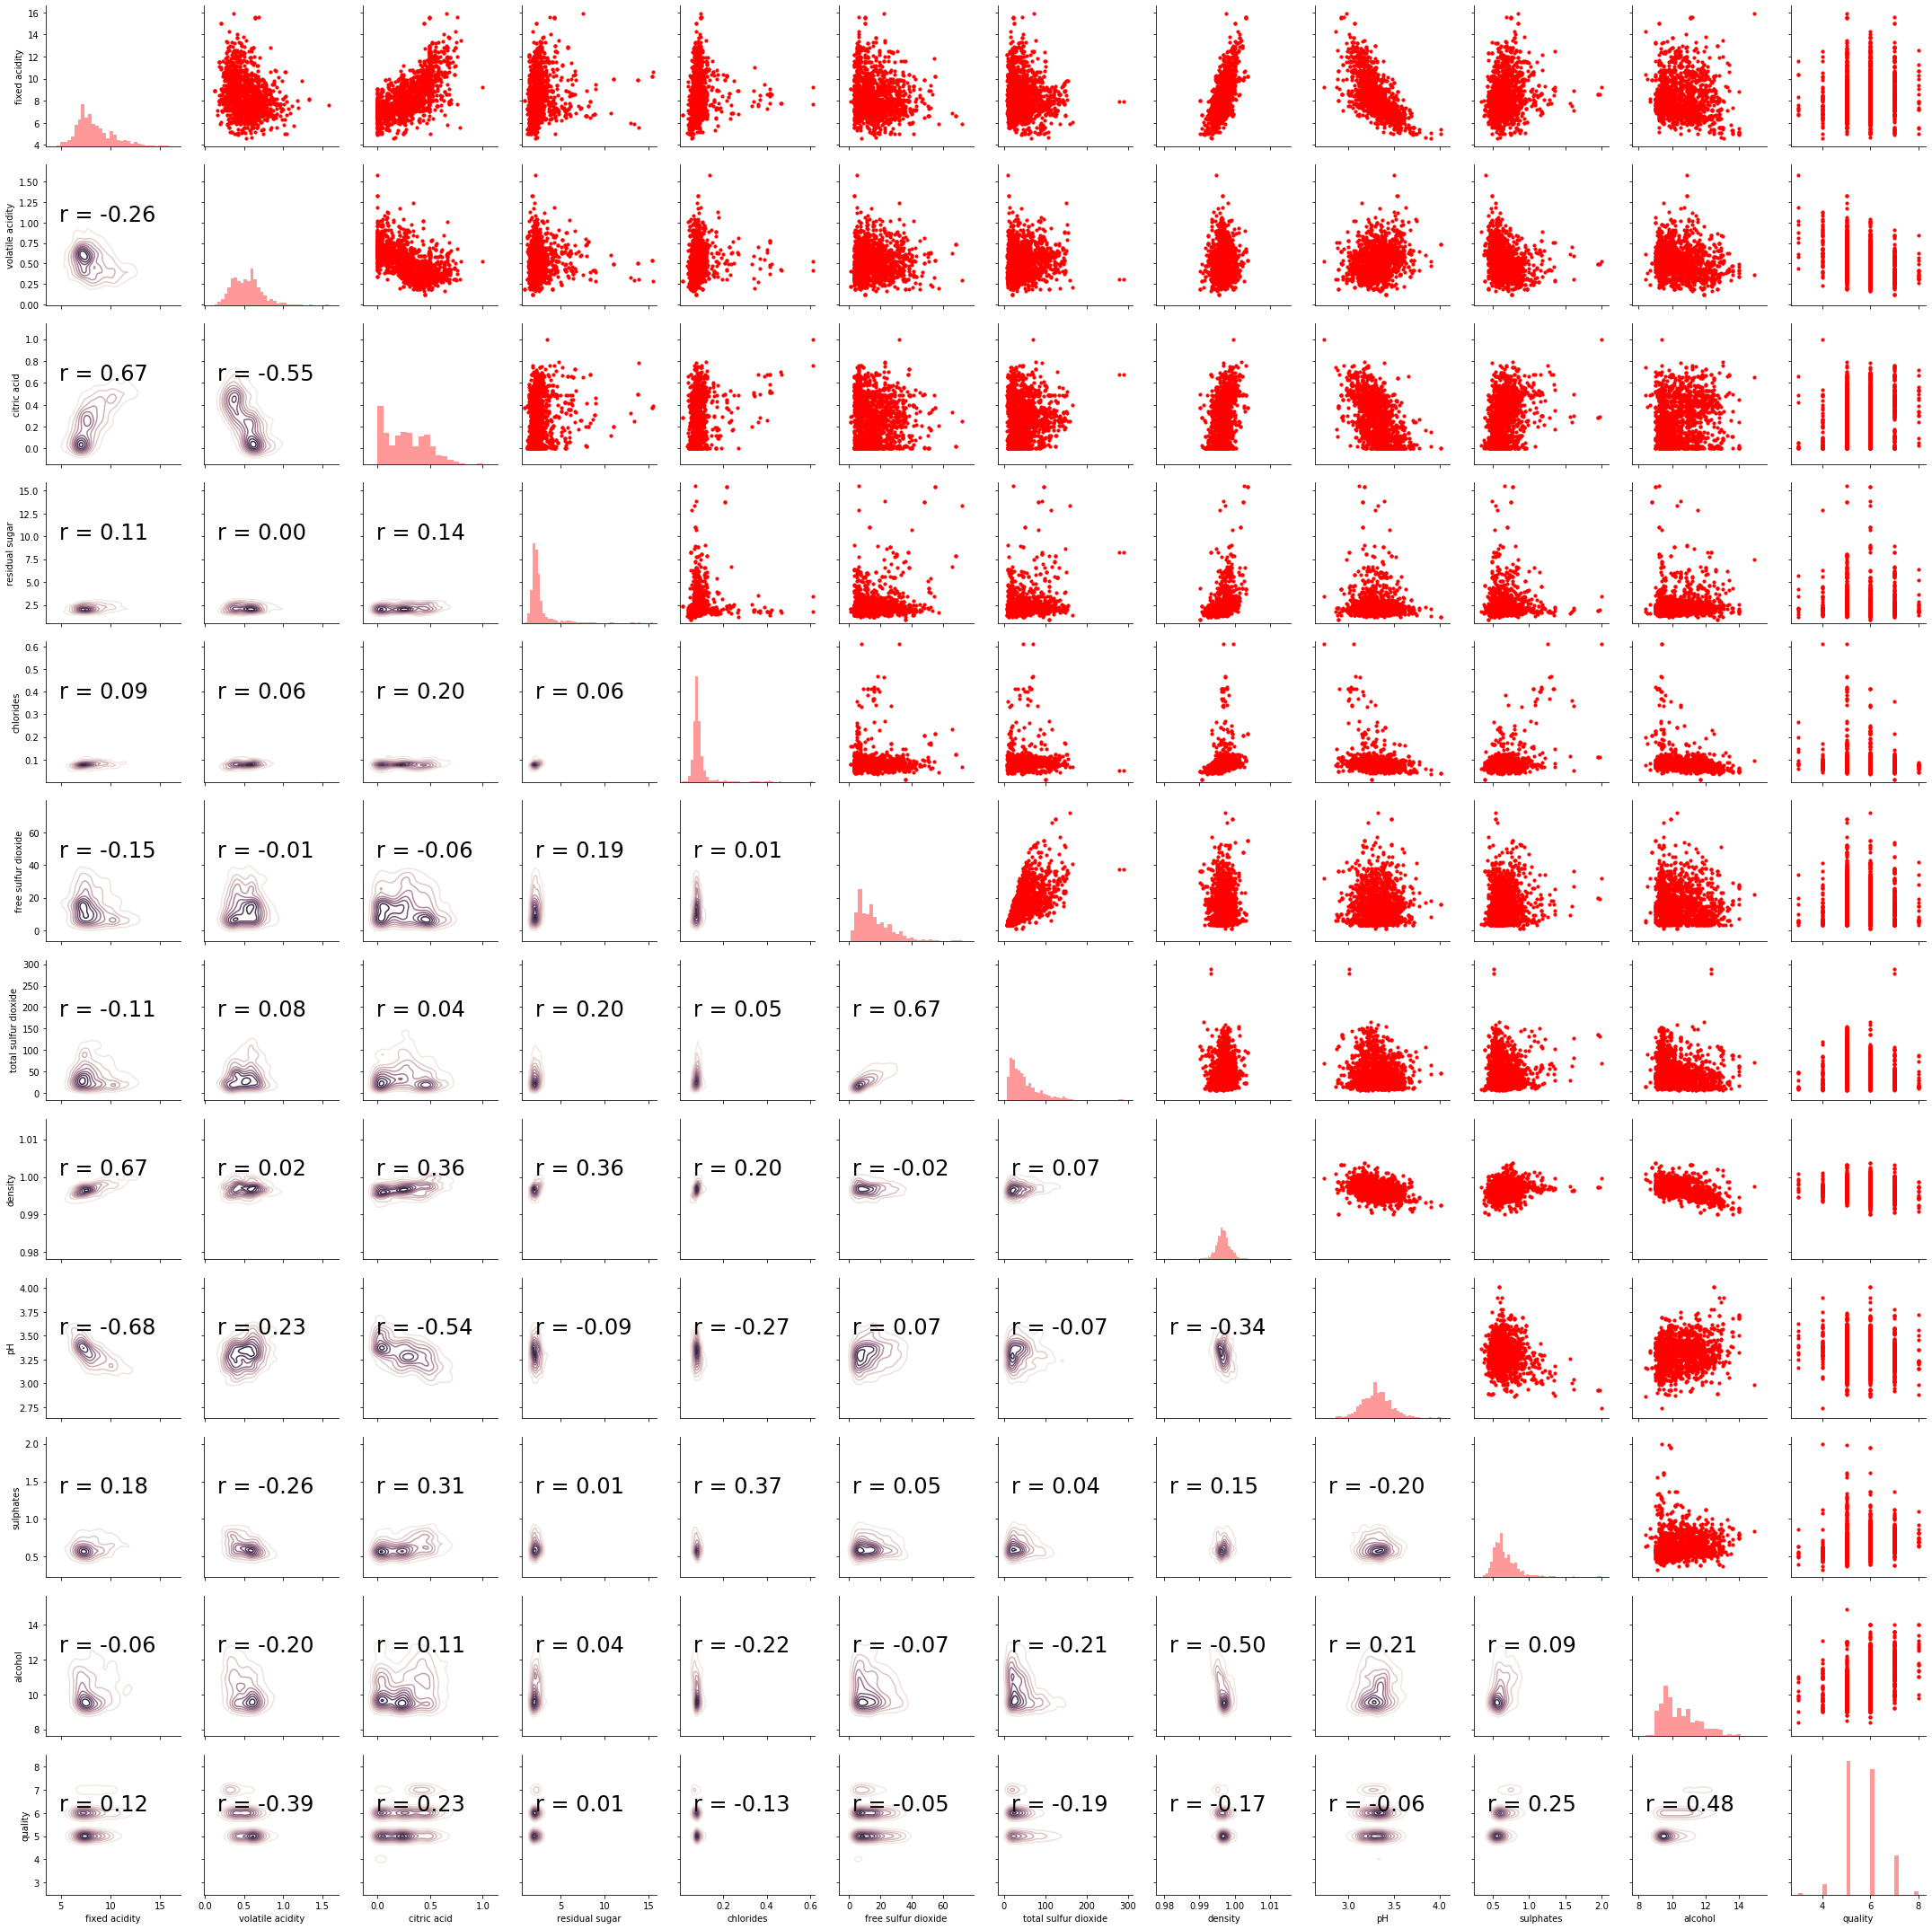

In [11]:
#9 generating pair plots using seaborn

print("\n\n9. Generate pair plot using the seaborn package. This will be used to identify and")
print("   report the redundant features, if there is any")

print("\n< Pair Plots(seaborn) >")
import warnings
warnings.filterwarnings('ignore')
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(X, y, **kws):
    r, _ = stats.pearsonr(X, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy = (.1, .6), xycoords = ax.transAxes, size = 24)
    
cmap = sns.cubehelix_palette(light = 1, dark = 0.1, hue = 0.5, as_cmap = True)

sns.set_context(font_scale = 2)

# Pair grid set up
g = sns.PairGrid(df_shuff)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s = 10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde = False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

<font color=black size=6><u><b>Part C: Model Evaluation</b></u></font>

In [12]:
# Create a separate feature set (Data Matrix X) and Target (1D Vector y)
X = df.drop(columns = 'quality')
y = df['quality']
print("< Shape of feature set (Data Matrix X) >\n", X.shape)
print("\n< Shape of target (1D Vector y) >\n", y.shape)

# Scale the features
X_mean = np.mean(X)
X_std  = np.std(X)
X_scaled =  (X-X_mean)/X_std
X = X_scaled
print("\n< Scaled Features >\n", X_scaled.head())

< Shape of feature set (Data Matrix X) >
 (1599, 8)

< Shape of target (1D Vector y) >
 (1599,)

< Scaled Features >
      fixed acidity  volatile acidity  citric acid  chlorides  \
813      -0.815625         -0.769931    -0.159061   0.308890   
174      -0.585813         -0.825796    -0.313113  -0.158692   
291       1.539950         -1.831362     1.073350   5.431037   
431      -0.298547          0.123905     0.405794  -0.286214   
337      -0.298547         -0.546472     0.251743  -0.158692   

     total sulfur dioxide   density  sulphates   alcohol  
813             -1.200175 -1.127169  -0.461180  0.917099  
174             -0.348724 -0.342749  -1.110324 -0.866379  
291             -0.865676  0.611276   0.305990  0.072294  
431              0.593954  0.346269  -0.579207 -1.147981  
337              0.350683  0.346269  -0.107102 -0.115441  


In [13]:
# Partition function
# this is from Assignment01
def partition(X_data, y_data, testSIZE):
    # create random train/test split
    index = np.arange(X_data.shape[0])
    num_training_index = int((1 - testSIZE)*X_data.shape[0])
    # data shuffling randomly
    index_shuf = np.random.shuffle(index)
    # split the actual data
    train_index = index[:num_training_index]
    test_index = index[num_training_index:]
    X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

X_train, X_test, y_train, y_test = partition(X, y, testSIZE = 0.2)
#generating train sets and test sets using partition function

In [14]:
#10 Hyperparameter tuning:

# we chose to use cv = 13 

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 1.0
my_res_1 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',1.0)
my_res_2 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',1.0)
my_res_3 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',1.0)
my_res_4 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1',1.0)

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 0.1
my_res_5 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',0.1)
my_res_6 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',0.1)
my_res_7 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',0.1)
my_res_8 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1',0.1)

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 0.01
my_res_9 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',0.01)
my_res_10 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',0.01)
my_res_11 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',0.01)
my_res_12 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1',0.01)

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 0.001
my_res_13 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',0.001)
my_res_14 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',0.001)
my_res_15 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',0.001)
my_res_16 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1',0.001)

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 0.0001
my_res_17 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',0.0001)
my_res_18 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',0.0001)
my_res_19 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',0.0001)
my_res_20 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1', 0.0001)

# learning_rate from 0.1 to 0.0001 for l1 & lambd = 0
my_res_21 = sFold(13, X, y, Linear_Regression, 0.1, 'l1',0)
my_res_22 = sFold(13, X, y, Linear_Regression, 0.01, 'l1',0)
my_res_23 = sFold(13, X, y, Linear_Regression, 0.001, 'l1',0)
my_res_24 = sFold(13, X, y, Linear_Regression, 0.0001, 'l1',0)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 1.0
my_res_25 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',1.0)
my_res_26 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',1.0)
my_res_27 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',1.0)
my_res_28 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',1.0)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 0.1
my_res_29 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',0.1)
my_res_30 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',0.1)
my_res_31 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',0.1)
my_res_32 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',0.1)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 0.01
my_res_33 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',0.01)
my_res_34 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',0.01)
my_res_35 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',0.01)
my_res_36 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',0.01)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 0.001
my_res_37 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',0.001)
my_res_38 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',0.001)
my_res_39 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',0.001)
my_res_40 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',0.001)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 0.0001
my_res_41 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',0.0001)
my_res_42 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',0.0001)
my_res_43 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',0.0001)
my_res_44 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',0.0001)

# learning_rate from 0.1 to 0.0001 for l2 & lambd = 0
my_res_45 = sFold(13, X, y, Linear_Regression, 0.1, 'l2',0)
my_res_46 = sFold(13, X, y, Linear_Regression, 0.01, 'l2',0)
my_res_47 = sFold(13, X, y, Linear_Regression, 0.001, 'l2',0)
my_res_48 = sFold(13, X, y, Linear_Regression, 0.0001, 'l2',0)

Optimalres = min(my_res_1[2],my_res_2[2],my_res_3[2],my_res_4[2],my_res_5[2],my_res_6[2],my_res_7[2],
                my_res_8[2],my_res_9[2],my_res_10[2],my_res_11[2],my_res_12[2],my_res_13[2],my_res_14[2],
                my_res_15[2],my_res_16[2],my_res_17[2],my_res_18[2],my_res_19[2],my_res_20[2],my_res_21[2],
                my_res_22[2],my_res_23[2],my_res_24[2],my_res_25[2],my_res_26[2],my_res_27[2],my_res_28[2],
                my_res_29[2],my_res_30[2],my_res_31[2],my_res_32[2],my_res_33[2],my_res_34[2],my_res_35[2],
                my_res_36[2],my_res_37[2],my_res_38[2],my_res_39[2],my_res_40[2],my_res_41[2],my_res_42[2],
                my_res_43[2],my_res_44[2],my_res_45[2],my_res_46[2],my_res_47[2],my_res_48[2])

print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 1.0 ->", my_res_1[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 1.0 ->", my_res_2[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 1.0 ->", my_res_3[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 1.0 ->", my_res_4[2])
print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.1 ->", my_res_5[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.1 ->", my_res_6[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.1 ->", my_res_7[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.1 ->", my_res_8[2])
print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.01 ->", my_res_9[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.01 ->", my_res_10[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.01 ->", my_res_11[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.01 ->", my_res_12[2])
print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.001 ->", my_res_13[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.001 ->", my_res_14[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.001 ->", my_res_15[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.001 ->", my_res_16[2])
print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.0001 ->", my_res_17[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.0001 ->", my_res_18[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.0001 ->", my_res_19[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.0001 ->", my_res_20[2])
print("Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0 ->", my_res_21[2])
print("Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0 ->", my_res_22[2])
print("Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0 ->", my_res_23[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0 ->", my_res_24[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 1.0 ->", my_res_25[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 1.0 ->", my_res_26[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 1.0 ->", my_res_27[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 1.0 ->", my_res_28[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 0.1 ->", my_res_29[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 0.1 ->", my_res_30[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 0.1 ->", my_res_31[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 0.1 ->", my_res_32[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 0.01 ->", my_res_33[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 0.01 ->", my_res_34[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 0.01 ->", my_res_35[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 0.01 ->", my_res_36[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 0.001 ->", my_res_37[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 0.001 ->", my_res_38[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 0.001 ->", my_res_39[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 0.001 ->", my_res_40[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 0.0001 ->", my_res_41[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 0.0001 ->", my_res_42[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 0.0001 ->", my_res_43[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 0.0001 ->", my_res_44[2])
print("Ave. mse - lerning rate:0.1, regularizer: l2, lambd: 0 ->", my_res_45[2])
print("Ave. mse - lerning rate:0.01, regularizer: l2, lambd: 0 ->", my_res_46[2])
print("Ave. mse - lerning rate:0.001, regularizer: l2, lambd: 0 ->", my_res_47[2])
print("Ave. mse - lerning rate:0.0001, regularizer: l2, lambd: 0 ->", my_res_48[2])

print("\nThe Minimal error is: ", Optimalres)

print("\nThe best Hyperparameters are: ")

print("\n      lerning rate:0.01, regularizer: l2, lambd: 1.0")

Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 1.0 -> 0.4146626068392543
Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 1.0 -> 0.41456961858483143
Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 1.0 -> 4.878947847004683
Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 1.0 -> 26.764989903666873
Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.1 -> 0.4146219838589052
Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.1 -> 0.41454468782388565
Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.1 -> 4.880501503805198
Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.1 -> 26.765645472976352
Ave. mse - lerning rate:0.1, regularizer: l1, lambd: 0.01 -> 0.4146186257398737
Ave. mse - lerning rate:0.01, regularizer: l1, lambd: 0.01 -> 0.41454266336365125
Ave. mse - lerning rate:0.001, regularizer: l1, lambd: 0.01 -> 4.880657002897653
Ave. mse - lerning rate:0.0001, regularizer: l1, lambd: 0.01 -> 26.765711034471636
Ave. mse - lerning rate:0.1, r

In [15]:
#11 Evaluating test data

test_evaled = sFold(10, X_test, y_test, Linear_Regression, 0.01, 'l2', 1.0)

#reporting mse for test with hyperparameters:
print("Test MSE: ", test_evaled[2])


Test MSE:  0.45883545819290306


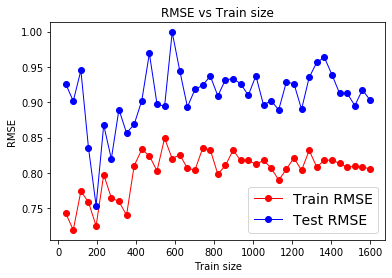

In [16]:
#12 Learning curve using hyperparameters.

RMSEs = learning_curve(Linear_Regression, X_scaled, y, 13, train_size = 39, 
                       learning_rate= 0.01, regularizer = 'l2',
                       lambd = 1.0) 

train_sizes = []
length = int(len(X_scaled)/39)
for i in range(1, length+1):
    train_size = 39*i
    train_sizes.append(train_size)

plt.plot(train_sizes, RMSEs[0], "ro-", alpha = 1.0, linewidth = 1.0, label = "Train RMSE")
plt.plot(train_sizes, RMSEs[1], "bo-", alpha=1.0, linewidth=1.0, label="Test RMSE")
plt.legend(loc = "best", fontsize = 14)
plt.xlabel("Train size")
plt.ylabel("RMSE")
plt.title("RMSE vs Train size")
plt.show()